We've mainly learned to use techniques to work with numeric data. However, data analysts and scientists frequently need to work with sequences of characters, otherwise known as **string** data, as well.

Knowing how to manipulate strings will come in handy often. Sometimes we'll need to extract part of a string, such as a name, date, or time that's buried in a longer character string.

In this file, we'll learn to manipulate string components of FiveThirtyEight's [data](https://www.kaggle.com/fivethirtyeight/world-cup) on the [2014 FIFA World Cup](https://en.wikipedia.org/wiki/2014_FIFA_World_Cup).

We'll work on performing string manipulations, as well as reviewing data analysis techniques including data frame manipulations and built-in functions for solving `split-apply-combine` problems.

`library(readr)
scores <- read_csv("scores.csv")`

As we learn to manipulate strings, we'll work with a new tidyverse package: [stringr](https://stringr.tidyverse.org/articles/stringr.html). The `stringr` package contains tools for combining, splitting, adding, and removing spaces from, and performing other useful manipulations with string data. Let's install and load the package:

`install.packages("stringr")
library(stringr)`

Functions in the `stringr` package have consistent syntax — all begin with the prefix `str_`, which makes working with the package especially convenient in RStudio because of its autocomplete feature.

As we look at the `scores` data frame, we'll see there's only one problem: There's a `match_date` variable that consists of the `month` and `day` on which a match was played. However, there's no month variable to use to group the data frame by.

This is the sort of problem string manipulation can be used to solve. We can use a few different methods to extract the `month` from `match_date` and create a new `match_month` variable.

The `str_sub()` function takes a string, subsets it based on positions (index) of characters within the string, and returns a new string containing only the characters between the specified positions.

The `str_sub()` function is vectorized. We can apply it to a vector and return a new vector

To subset the `home_country` variable and return a new vector consisting of the first four letters of each country, we would specify positions from left to right and would write:

`str_sub(scores$home_country, 1, 4)`

We can also specify positions from right to left by using a `-` before the position number.

If we wanted to return the last four letters of each country, we would write:

`str_sub(scores$home_country, -4, -1)`

**Task**

* Use the `str_sub()` function to extract the month from `match_date`, and save the new vector as `match_month`.

**Answer**

`match_month <- str_sub(scores$match_date,-4,-1)`

We may have noticed `str_sub()`' would not have worked if the month names were different lengths.

Let's learn about another technique for subsetting strings that isn't position-dependent — splitting strings using the `str_split()` function.

The `str_split()` function is used to split a string into pieces. The place where the string is split, such as a space, a comma, or another character or characters, is referred to as the **delimeter**.

To split `match_date_2` at the space between day and month, we would write:

`str_split(match_date_2, " ")`

The `str_split()` function output is, by default, a list:

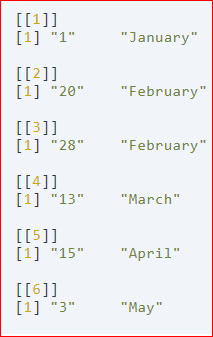

However, we can simplify output into a matrix using the argument `simplify = TRUE`:

`match_date_2_split <- str_split(match_date_2, " ", simplify = TRUE)`

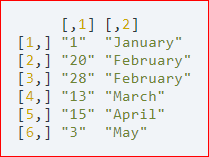

Recall that we can index a matrix to extract columns. If we wanted to save the second column of the matrix `match_date_2_split` as a new vector, we could write:

`match_month <- match_date_2_split[,2]`

**Task**

* Let's use the `str_split()` function to separate the `match_date` variable of the `scores` data frame into day and month.

**Answer**

`match_matrix <- str_split(scores$match_date, " ", simplify = TRUE)`

`scores <- scores %>% mutate(match_month = match_matrix[,2])`

Our goal is to calculate the average number of total goals scored each month. To perform this task, we'll make use of the new `match_month` variable we created, as well as techniques we've learned previously:

* Creating a new data frame variable using `mutate()`
* Using `group_by()` and `summarize()` to solve a "split-apply-combine" problem
* Using the pipe operator `%>%` to chain functions (if we choose)

`avg_monthly_goals <- scores %>% mutate(total_goals = home_goals+ away_goals) %>% group_by (match_month) %>% summarize(mean(total_goals))`

Now we'll focus on a second task: Manipulating string data in the `scores` data frame to generate a new variable consisting of a summary of each match result.

Let's say we've been asked to create a summary of each match in the 2014 World Cup from the scores data frame. For each match, we need a summary in the following format:

`"Argentina beat Switzerland on July 01 2014 with scores of 1 to 0"`

To begin, we'll introduce a function for combining strings: `str_c()`.

To combine the `home_country` and `away_country` strings, we would write:

`str_c(scores$home_country, scores$away_country)`

The first few rows of the output vector look like:

`"BrazilCroatia" "MexicoCameroon" "SpainNetherlands"               
 "ChileAustralia" "ColombiaGreece" "UruguayCosta Rica"`

We can use the `sep =` argument within the `str_c()` function to specify characters to place between the strings we're combining. 

`str_c(scores$home_country, scores$away_country, sep = " played against ")`

`"Brazil played against Croatia" "Mexico played against Cameroon" "Spain  played against Netherlands" "Chile played against Australia" "Colombia played against Greece" "Uruguay played against Costa Rica"`

Note the spaces on either side of "played against" in the code above. Spaces count as characters. If we don't include them, the results will look like

`Brazilplayed againstCroatia.`

**Task**

* The `score`s data frame already contains a variable, `win_country`, for the `winning team`. Create a new variable, `lose_country`, for the losing team.

* Use the `str_c()` function to create a new variable, `team_results`, containing a summary of match results in the following format: `win_country beat lose_country`.

**Answer**

`scores <- scores %>% 
        mutate(lose_country = if_else(win_country == home_country, away_country, home_country))`
        
`team_results <- str_c(scores$win_country, " beat ", scores$lose_country)`
                             
                             

We've now learned to create a new variable, `team_results`, that contains data in the format of the first portion (`Argentina beat Switzerland`) of the summary we're working on generating:

`"Argentina beat Switzerland on July 01 2014 with scores of 1 to 0"`

Next, let's focus on manipulating the `match_date` provided in the scores data frame to get it to match the formatting required for the summary.

To create the `match_month` variable, we indexed `match_matrix` to select the second column.

**Task**

Create a new variable, match_day, by indexing to select the first column of match_matrix.

**Answer**

`match_matrix <- str_split(scores$match_date, " ", simplify = TRUE)`

`match_day <- match_matrix[,1]`

Let's take a look at the `match_day` variable we just created:

`"12" "13" "13" "13" "14" "14" "15" "15" "15" "15" "16" "16" "17" "17" "17" "18" "18" "18" "19" "19" "19" "20" "20" "21" "21" "21" "22" "22" "23" "23" "23" "23" "24" "24" "24" "24" "25" "25" "25" "25" "26" "26" "26" "28" "28" "29" "29" "30" "30" "1"  "1"  "4"  "4" "5"  "5"  "8"  "9" "12" "13"`

If we compare the format of the `match_day` to the day of the month component of the summary:

`"Argentina beat Switzerland on July 01 2014 with scores of 1 to 0"`

We can see that unlike the days in the summary, the single-digit dates in the variable we created have only one digit instead of two:

`"1"  "1"  "4"  "4" "5"  "5"  "8"  "9"`

To match the format of the date in the summary, we'd need to add a zero before the existing characters in `match_day`.

For this task, we'll introduce the `stringr` function `str_pad`, which lets us specify characters to an existing string to make it a specified length.

The function takes as arguments:

* The string we're working with
* The number of digits we want the string to be
* The side we want to add characters to
* The character(s) we want to add

To bring the length of all days of the month up to two by adding a zero to the left side of the strings, we would write:

`vector_2 <- str_pad(vector_1, 2, side = "left", pad = "0")`

We can check the length of all strings in a vector by using the function `str_length()`. The `str_length()` function returns a vector containing the number of characters in each string:

`str_length(vector_2)`

`2 2 2 2 2 2`

**Task**

* Use `str_pad()` to bring the length of all days of the `match_day` variable we created to two by adding a zero to the left side of the strings.

**Answer**

`scores <- scores %>%
        mutate(match_day = str_pad(match_day, 2, side = "left", pad = "0"))`
   
`match_day_length <- str_length(scores$match_day)`

So far in this file, we've added the following variables to the scores data frame:

* match_month
* lose_country
* match_day

We're nearly ready to use `str_c()` to combine the required variables into a match summary variable

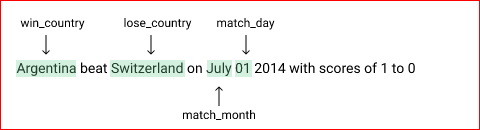

**Task**

* Create a new variable, `win_goals`, containing the winning country's goals for each match.
* Create a new variable, `lose_goals`, containing the losing country's goals for each match.
* Add both variables to the `scores` data frame, and overwrite the original scores data frame with the one containing our new variables.


**Answer**

`scores <- scores %>% 
  mutate(win_goals = if_else(home_country == win_country, home_goals, away_goals),
         lose_goals = if_else(home_country == win_country, away_goals, home_goals))`

Now that we've created the `win_goals` and `lose_goals` variables, we have all the pieces we need to create our match summary variable:

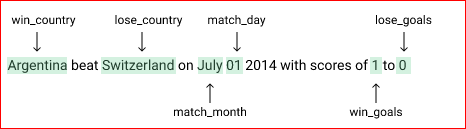

To create the summary variable, we can use the `str_c()` function to combine the variables we created with additional strings that will be the same for each match.

When we use `str_c()` to combine strings, the recycling rule is followed. For example, if we combine the `scores` data frame variable `match_id` with the string `"match number"`:

`str_c("match number", scores$match_id, sep = " ")`

The output will look like this:

`"match number 1"  "match number 2"  "match number 3"  "match number 4"  "match number 5"`

**Task**

* Use the `str_c()` function to create a vector of summaries for each match in the 2014 World Cup in the format `"Argentina beat Switzerland on July 01 2014 with scores of 1 to 0"`.

* Save the vector of summaries as `match_summary`.

**Answer** 

`match_summary <-  str_c(scores$win_country, "beat", scores$lose_country, "on", scores$match_month, scores$match_day, "2014 with scores of", scores$win_goals, "to", scores$lose_goals, sep = " ")`

We've now successfully generated summaries for the matches in the 2014 World Cup:

match_summary

`"Brazil beat Croatia on June 12 2014 with scores of 3 to 1"
"Mexico beat Cameroon on June 13 2014 with scores of 1 to 0"
"Netherlands beat Spain on June 13 2014 with scores of 5 to 1"
"Chile beat Australia on June 13 2014 with scores of 3 to 1"
"Colombia beat Greece on June 14 2014 with scores of 3 to 0"`